# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [98]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [100]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [102]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [106]:
# Capture the HTML content
html = browser.html

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

print("Website visited and HTML captured successfully!")

Website visited and HTML captured successfully!


In [108]:
# Find the table
table = soup.find('table')

# Extract all rows
rows = table.find_all('tr')

# Print the rows
for row in rows:
    cols = row.find_all('td')
    col_data = [col.text.strip() for col in cols]
    print(col_data)


[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [111]:
# Create an empty list
mars_data = []

# Get the column headers from the first row
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols = row.find_all('td')
    col_data = [col.text.strip() for col in cols]
    # Create a dictionary for each row using headers as keys
    row_dict = dict(zip(headers, col_data))
    mars_data.append(row_dict)

In [115]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=headers)

In [117]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [119]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [121]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime format
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert 'sol' to integer
mars_df['sol'] = mars_df['sol'].astype(int)

# Convert 'ls' to float
mars_df['ls'] = mars_df['ls'].astype(float)

# Convert 'min_temp' to float
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Convert 'pressure' to float
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [123]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [127]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
print(mars_months)

12


In [131]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_df['sol'].nunique()
print(martian_days)

1867


In [133]:
# 3. What is the average minimum temperature by month?
avg_temp_per_month = mars_df.groupby('month')['min_temp'].mean()
print(avg_temp_per_month)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


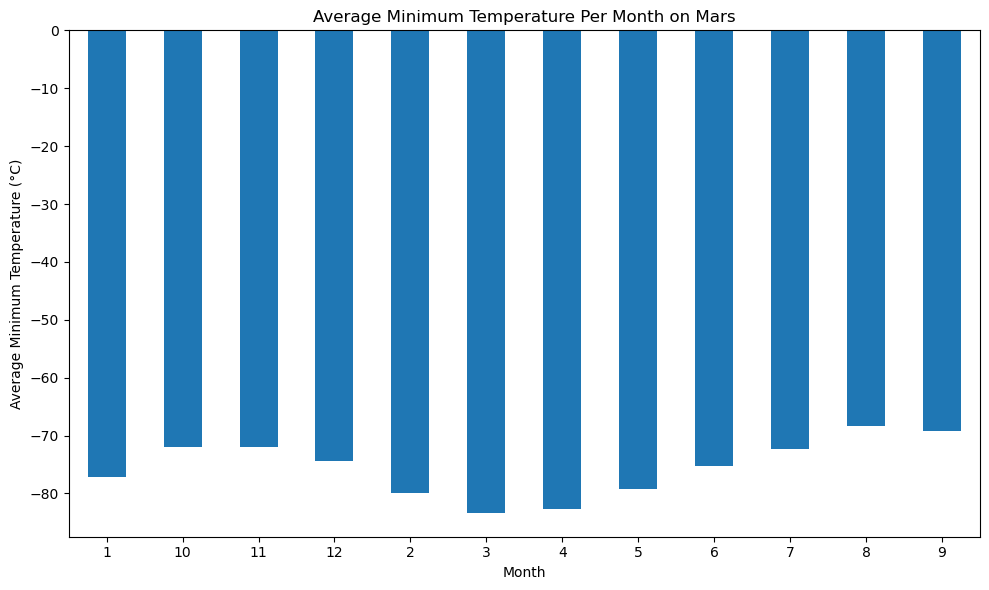

In [135]:
# Plot the average minimum temperature by month
avg_temp_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Temperature Per Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()  
plt.show()

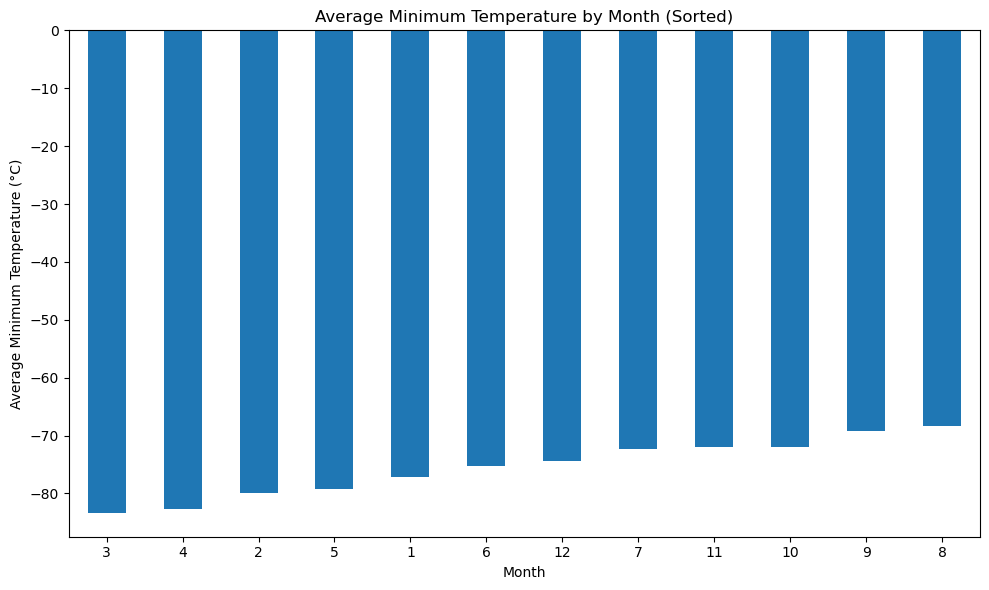

In [147]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the average temperature per month in ascending order (coldest to hottest)
avg_temp_per_month_sorted = avg_temp_per_month.sort_values()

# Plotting the sorted average minimum temperature per month
avg_temp_per_month_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()  # To adjust the layout
plt.show()

In [143]:
# 4. What is the average pressure by month?
avg_pressure_per_month = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure_per_month)

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


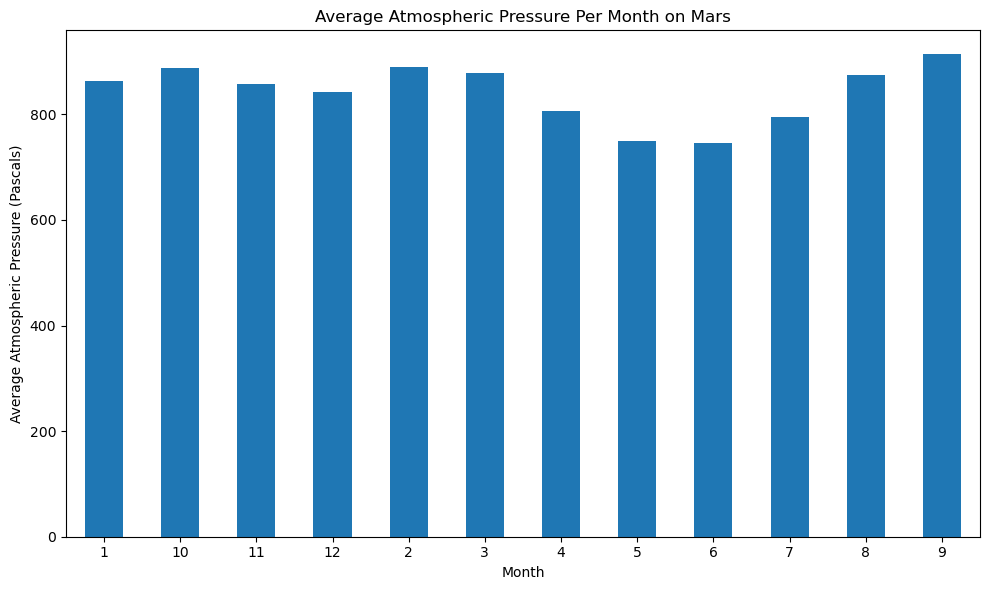

In [145]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Atmospheric Pressure Per Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pascals)')
plt.xticks(rotation=0)
plt.tight_layout()  # To adjust the layout
plt.show()

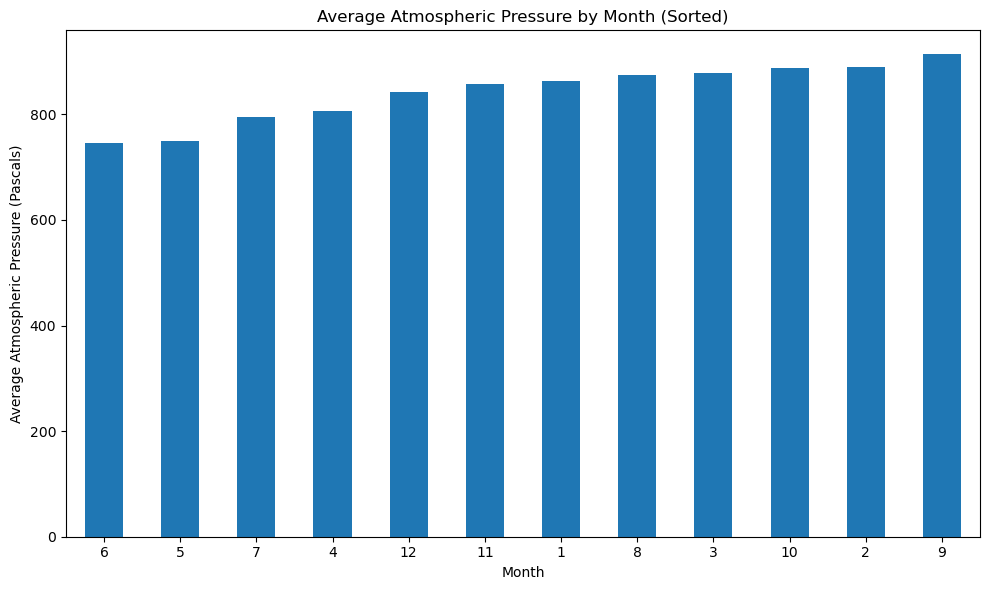

In [149]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_per_month_sorted = avg_pressure_per_month.sort_values()

# Plotting the sorted average atmospheric pressure per month
avg_pressure_per_month_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Average Atmospheric Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pascals)')
plt.xticks(rotation=0)
plt.tight_layout() 
plt.show()

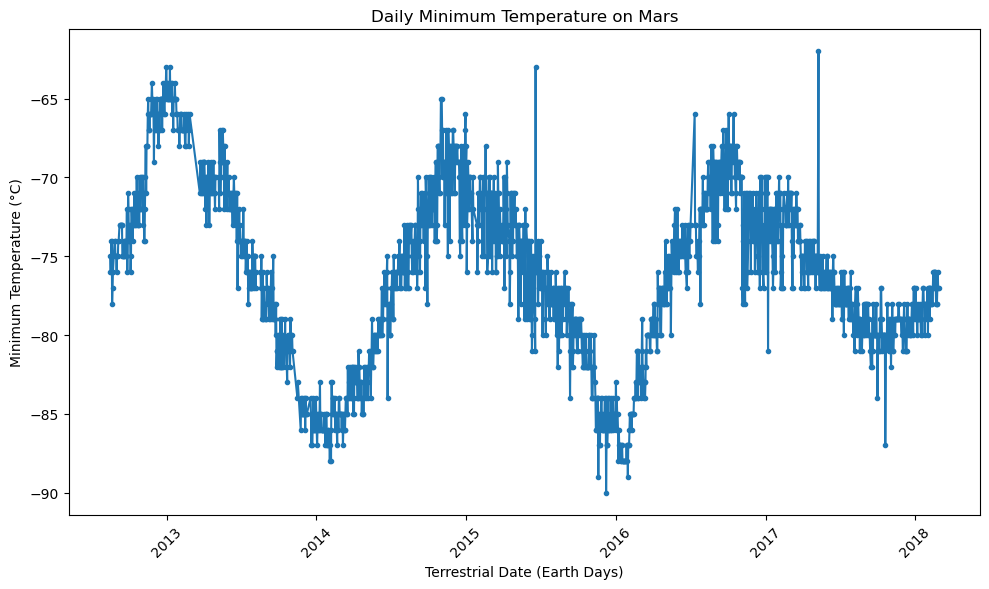

In [153]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], marker='o', linestyle='-', markersize=3)
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date (Earth Days)')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Minimum Temperature

The minimum temperature on Mars varies throughout the months. Looking at the charts and the data we visualized, it seems that the temperature on Mars get colder within the earlier months of the year. It also varies year to year.

#### Atmospheric Pressure

The atmospheric pressure on Mars fluctuates across different months. By analyzing the data, we can identify the months with the highest (the 9th month of the year) and lowest (the 5th month of the year) pressure. 

#### Year Length

By visually inspecting the temperature plot, we can estimate the number of Earth days it takes for the temperature cycle to repeat itself, which will give us an estimate of how long a Martian year is in Earth days. The cyclic nature of temperature trends is indicative of the Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [162]:
# Write the data to a CSV

# Example results based on your analysis
analysis_data = {
    'Minimum Temperature': ['Coldest Month', 'Warmest Month', 'Average Temperature'],
    'Atmospheric Pressure': ['Highest Pressure Month', 'Lowest Pressure Month', 'Average Pressure'],
    'Year Length': ['Estimated Earth Days in Martian Year']
}

# Replace with actual values from your analysis
analysis_values = {
    'Minimum Temperature': ['Month_X', 'Month_Y', mars_df['min_temp'].mean()],  # Replace 'Month_X' with actual coldest month
    'Atmospheric Pressure': ['Month_A', 'Month_B', mars_df['pressure'].mean()],  # Replace 'Month_A' with actual highest pressure month
    'Year Length': [687]  # Example: Martian year is around 687 Earth days
}

# Combine the data into a DataFrame
analysis_df = pd.DataFrame(analysis_values, index=analysis_data['Minimum Temperature'])

# Write the DataFrame to a CSV file
analysis_df.to_csv('mars_analysis.csv')

# Confirm the data written to the CSV
analysis_df

,Minimum Temperature,Atmospheric Pressure,Year Length
Coldest Month,Month_X,Month_A,687
Warmest Month,Month_Y,Month_B,687
Average Temperature,-76.12105,841.066417,687


In [164]:
browser.quit()